In [31]:
import os
import sys
MAIN_PATH = os.path.dirname(os.getcwd())
sys.path.insert(0, MAIN_PATH)

import matplotlib.pyplot as plt
import numpy as np
import librosa

In [32]:
y, sr = librosa.load(os.path.join(MAIN_PATH, 'data/c2-c4-g6-a6.wav'), sr=8000)

In [33]:
import librosa.display

In [34]:
S = librosa.stft(y, n_fft=1024, hop_length=512)
S = librosa.amplitude_to_db(np.abs(S), ref=np.max)

In [35]:
print(S.max(), S.min())

0.0 -80.0


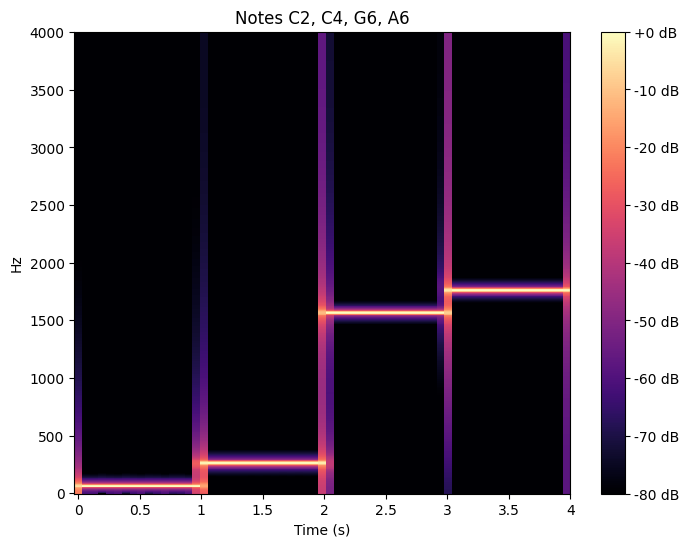

In [36]:
fig, ax = plt.subplots(figsize = (8, 6))
img = librosa.display.specshow(data=S, n_fft=1024, hop_length = 512, x_axis='s', y_axis='linear', ax=ax, sr=sr)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set_title("Notes C2, C4, G6, A6")
# plt.savefig('images/c2-c4-g6-a6_log_amp.pdf', format='pdf')
plt.show()

In [37]:
def mel_scale(f):
    return 2595 * np.log10(1 + f / 700)

In [38]:
mel = np.vectorize(mel_scale)

In [39]:
f = np.linspace(start=0, stop=10_000, num=5_000)

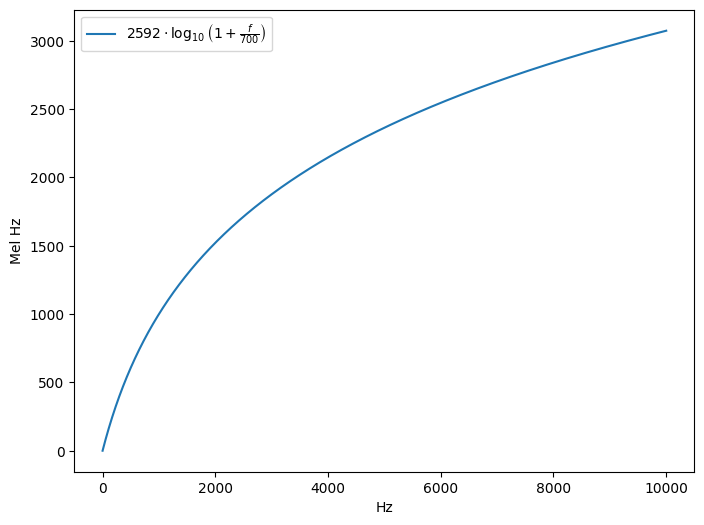

In [40]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(f, mel(f), label=r'$2592 \cdot \log_{10}\left(1 + \frac{f}{700}\right)$')
ax.set_xlabel('Hz')
ax.set_ylabel('Mel Hz')
plt.legend()
# plt.savefig("images/hz_to_mel.pdf", format='pdf')
plt.show()

In [41]:
frequencies = [0, 65, 262, 1568, 1760]

for f in frequencies:
    print(mel_scale(f))

0.0
100.07201038664134
358.30989810112817
1324.8643014861584
1416.4471890962723


In [42]:
def hz_to_mel(f):
    return 2595 * np.log10(1 + f / 700)

def mel_to_hz(f):
    return 700 * (10 ** (f / 2595) - 1)

m_vec = np.vectorize(hz_to_mel)
f_vec = np.vectorize(mel_to_hz)

In [43]:
S.shape

(513, 63)

In [44]:
L_0, H_0 = 0, sr/2
print(L_0, H_0)

0 4000.0


In [45]:
# Number of mel frequency bins
M = 20

In [46]:
L_1, H_1 = hz_to_mel(L_0), hz_to_mel(H_0)
print(L_1, H_1)

0.0 2146.06452750619


In [47]:
point_in_mel = np.linspace(start=0, stop=H_1, num=M+2, endpoint=True)

In [48]:
point_in_mel

array([   0.        ,  102.19354893,  204.38709786,  306.58064679,
        408.77419572,  510.96774464,  613.16129357,  715.3548425 ,
        817.54839143,  919.74194036, 1021.93548929, 1124.12903822,
       1226.32258715, 1328.51613608, 1430.709685  , 1532.90323393,
       1635.09678286, 1737.29033179, 1839.48388072, 1941.67742965,
       2043.87097858, 2146.06452751])

In [49]:
point_in_hz = f_vec(point_in_mel)

In [50]:
point_in_hz

array([   0.        ,   66.44144981,  139.18927999,  218.84206917,
        306.05521092,  401.54630636,  506.10106869,  620.57978815,
        745.92441061,  883.16628798, 1033.43466436, 1197.96596759,
       1378.11398271, 1575.36099112, 1791.32996697, 2027.79793121,
       2286.71057313, 2570.19825978, 2880.59356486, 3220.45046148,
       3592.5653366 , 4000.        ])

In [51]:
def triangular_filter(x, a, T):
    if np.abs(x-a) <= T / 2:
        return 1-np.abs(2 * (x - a) / T)
    else:
        return 0.

In [52]:
t1 = np.vectorize(triangular_filter)

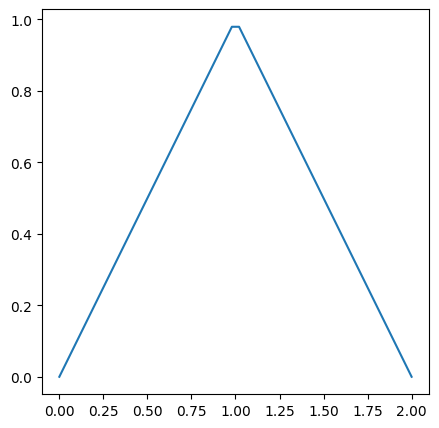

In [53]:
fig, ax =plt.subplots(figsize = (5,5))
x = np.linspace(start=0, stop=2, num=50, endpoint=True)
y = t1(x, a=1, T=2)
ax.plot(x, y)
plt.show()

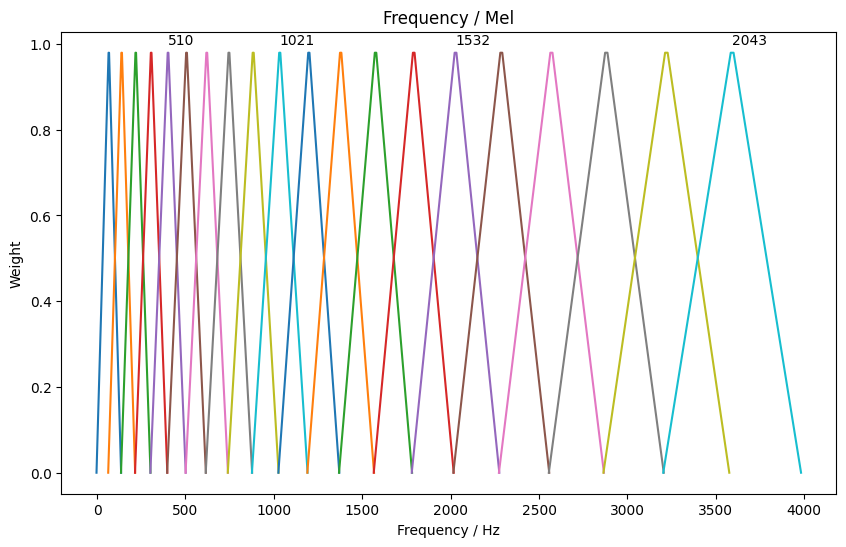

In [54]:
fig, ax = plt.subplots(figsize = (10, 6))
for i, p in enumerate(point_in_mel[1:-1], start=1):
    center = point_in_hz[i]
    center_to_ml = point_in_mel[i]
    left, right = point_in_hz[i-1], point_in_hz[i+1]
    T = (right - left)
    x = np.linspace(start = center - T / 2, stop=center + T / 2, num=50, endpoint=True)
    y = t1(x, a=center, T=T)
    ax.plot(x, y)
    if i % 5 == 0:
        ax.annotate(int(center_to_ml), (center, 1.))
ax.set_xlabel('Frequency / Hz')
ax.set_title('Frequency / Mel')
ax.set_ylabel('Weight')
# plt.savefig('images/triangular_filters.pdf', format='pdf')
plt.show()

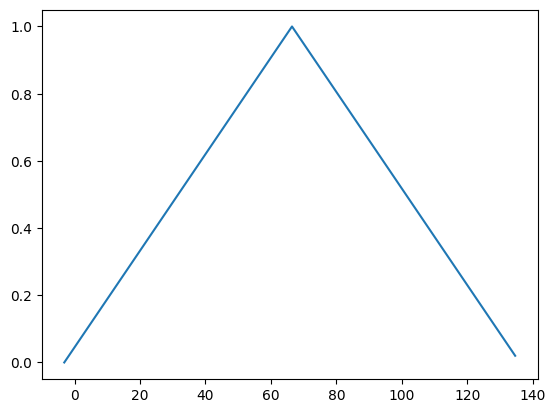

In [55]:
center = point_in_hz[1]
left, right = point_in_hz[0], point_in_hz[2]
a = center
T = right - left
x = np.linspace(start=center - T/2, stop=center + T/2, num=100, endpoint=False)
plt.plot(x, t1(x, a=a, T=T))
plt.show()

In [56]:
y, sr = librosa.load(os.path.join(MAIN_PATH, 'data/c2-c4-g6-a6.wav'), sr=8000)

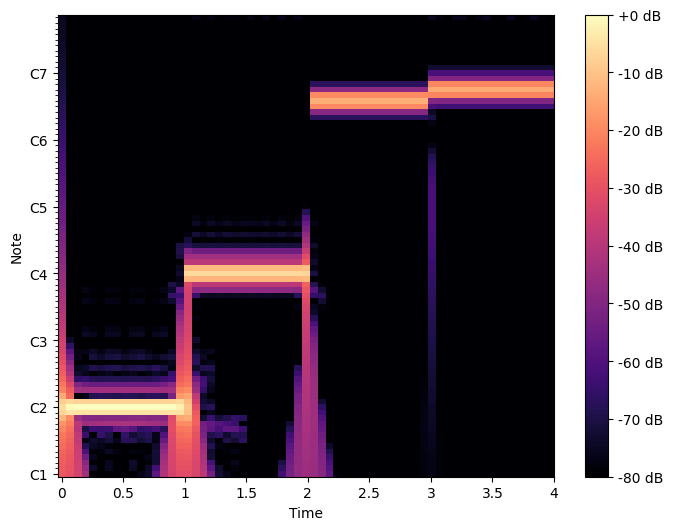

In [57]:
S_4 = librosa.cqt(y, sr=8000, hop_length=512, n_bins=83)

fig, ax = plt.subplots(figsize = (8, 6))
img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(S_4), ref=np.max), sr=sr, x_axis='time', y_axis = 'cqt_note', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
# plt.savefig('images/cqt_c2_a4_g6_a4.pdf', format='pdf')
plt.show()

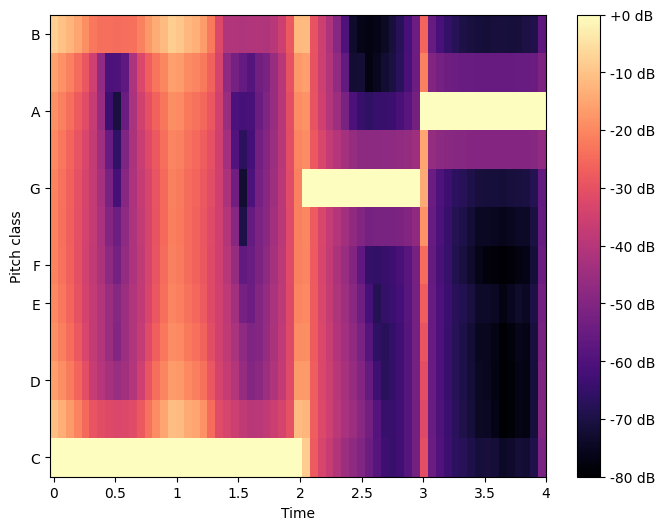

In [58]:
S = librosa.feature.chroma_cqt(y=y, sr=8000, hop_length=512, bins_per_octave=36, n_octaves=6)

fig, ax = plt.subplots(figsize = (8, 6))
img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(S), ref=np.max), sr=sr, x_axis='time', y_axis='chroma', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
# plt.savefig('images/chroma_c2_c4_g6_a6.png', format='png')
plt.show()